# Assignment 01: Exploratory Data Analysis & Data Preprocessing
### Seasons of Code - AnimAI
---
## Introduction

Welcome to your first assignment for the AnimAI project! In this assignment, you'll work with a dataset containing popularity statistics for various cartoon characters across different countries. This dataset has intentionally been made "messy" with outliers, missing values, and inconsistencies to simulate real-world data challenges.

The skills you learn in this assignment will form the foundation for more advanced machine learning and AI applications in later weeks of the project.

>**Objective**: To perform exploratory data analysis and preprocessing on a cartoon character popularity dataset, applying fundamental concepts of data cleaning, visualization, and statistical analysis.


## Dataset Overview

The dataset `cartoon_popularity_data.csv` contains information about cartoon character popularity across various countries with the following columns:

- `Character`: Name of the cartoon character
- `Country`: Country where the popularity was measured
- `Popularity_Score`: A rating from 0-100 indicating popularity (though some entries may fall outside this range)
- `Avg_Episodes_Watched_Per_Year`: Average number of episodes watched per viewer per year
- `Merchandise_Revenue_MillionUSD`: Revenue generated from character merchandise in millions of USD

First, let's import the necessary libraries and load our dataset:

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

# Load the dataset
file_path = 'cartoon_popularity_data.csv' # Fill here with the path to your dataset

# Check if the file exists
try:
    with open(file_path, 'r') as f:
        pass
except FileNotFoundError:
    print(f"File {file_path} not found. Please check the path and try again.")
    exit()

# Read the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print(f"Dataset shape: {df.shape}")
df.head(20)

Dataset shape: (10000, 5)


,Character,Country,Popularity_Score,Avg_Episodes_Watched_Per_Year,Merchandise_Revenue_MillionUSD
0,Shinchan,Canada,74.06677446676758,80,3.949924724368964
1,Paw Patrol,France,80.58192518328079,48,22.31606244865129
2,SpongeBob SquarePants,Russia,37.853437720835345,127.5,258.92694939230086
3,Motu Patlu,UK,83.41104266407503,50,27.430804382862224
4,Mr Bean,Egypt,76.83135775923722,9,40.715313915210565
5,Mr Bean,Russia,74.49889820916066,100,89.88446547664522
6,Shinchan,China,42.215996679968406,53,47.33693889068305
7,Shinchan,France,29.350012864742613,5,87.70944109744121
8,Motu Patlu,Australia,53.937903011962575,72,60.295513861562675
9,Motu Patlu,Saudi Arabia,48.59904633166138,73,13.710754985476516


## Part 1: Exploratory Data Analysis (EDA)

### Task 1.1: Basic Data Exploration

- Display the shape of the dataset
- Check the data types of each column
- Generate basic statistics using `describe()`
- Check for missing values in each column

In [4]:
# TODO: Your code here
print("Shape of the dataset:", df.shape) #data shape

# data type
print("\nData types of each column:")
print(df.dtypes)

#basic stats
print(df.describe())

# missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

Shape of the dataset: (10000, 5)

Data types of each column:
Character                         object
Country                           object
Popularity_Score                  object
Avg_Episodes_Watched_Per_Year     object
Merchandise_Revenue_MillionUSD    object
dtype: object
       Character    Country Popularity_Score Avg_Episodes_Watched_Per_Year  \
count      10000       9553             9558                          9933   
unique        50         41             9488                           492   
top     Doraemon  Australia          Unknown                            13   
freq         929        430               71                            93   

       Merchandise_Revenue_MillionUSD  
count                           10000  
unique                          10000  
top                 3.949924724368964  
freq                                1  

Missing values in each column:
Character                           0
Country                           447
Popularity_Score     

### Task 1.2: Data Visualization

Create appropriate visualizations to explore the dataset:

1. Distribution of popularity scores (histogram)
2. Average episodes watched by character (bar chart)
3. Merchandise revenue by country (box plot)
4. Correlation heatmap between numerical variables

TypeError: 'value' must be an instance of str or bytes, not a float

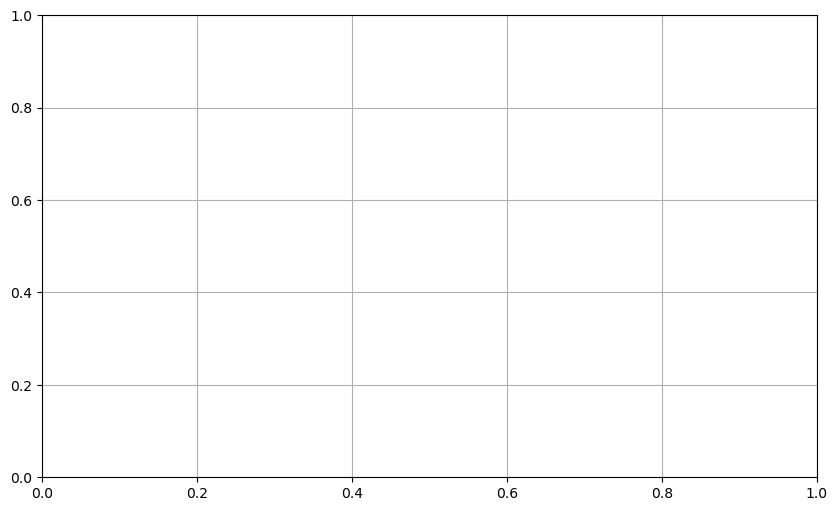

In [6]:
# TODO: Your code here

# Histogram 
plt.hist(df['Popularity_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [13]:
#grouping by character and taking mean
avg_episodes = df.groupby('Character')['Avg_Episodes_Watched_Per_Year'].mean()
# bar chart
plt.barh(avg_episodes.index, avg_episodes.values, color='lightgreen', edgecolor='black')
plt.title('Average Episodes Watched by Character')
plt.xlabel('Average Episodes Per Year')
plt.ylabel('Character')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

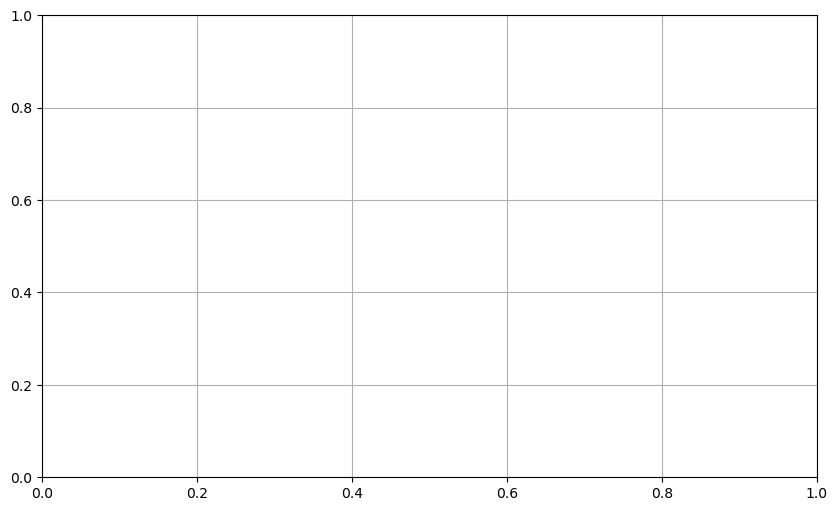

In [15]:
# Get unique countries
countries = df['Country'].unique()

# Prepare boxplot data
data = [df[df['Country'] == country]['Merchandise_Revenue_MillionUSD'] for country in countries]

# Plot
plt.boxplot(data, labels=countries, patch_artist=True,
            boxprops=dict(facecolor='lightcoral'),
            medianprops=dict(color='black'))

plt.title('Merchandise Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue (Million USD)')
plt.show()

In [17]:
# Select numeric columns
numerical_df = df[['Popularity_Score', 'Avg_Episodes_Watched_Per_Year', 'Merchandise_Revenue_MillionUSD']]
corr = numerical_df.corr()

# Heatmap with Matplotlib
fig, ax = plt.subplots()
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='left')
ax.set_yticklabels(corr.columns)
plt.title('Correlation Heatmap of Numerical Variables', pad=20)
plt.show()

ValueError: could not convert string to float: 'Unknown'

### Task 1.3: Identifying Data Issues

Based on your exploration:
- List all data quality issues you've found
- Categorize them (missing values, outliers, inconsistent formats, etc.)
- Explain how each issue might affect your analysis

In [ ]:
# TODO: Your code here
###
# issues are :
# 1) all the data in columns is not numeric
# 2) some data is missing

# for the issues 
# object data can be converted to numeric
# filling missing places with most appeared or average values



## Part 2: Data Cleaning and Preprocessing

### Task 2.1: Handling Missing Values

Implement strategies to handle missing values in the dataset:

- For categorical columns: Replace with mode or a placeholder
- For numerical columns: Replace with mean, median, or a calculated value
- Document your approach and justify your choices

In [19]:
# TODO: Your code here

# Fill missing values with mode (most common value)
df['Character'].fillna(df['Character'].mode()[0], inplace=True)
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

#converting str to numeric
df['Popularity_Score'] = pd.to_numeric(df['Popularity_Score'], errors='coerce')
df['Avg_Episodes_Watched_Per_Year'] = pd.to_numeric(df['Avg_Episodes_Watched_Per_Year'], errors='coerce')
df['Merchandise_Revenue_MillionUSD'] = pd.to_numeric(df['Merchandise_Revenue_MillionUSD'], errors='coerce')

# Fill missing values
df['Popularity_Score'].fillna(df['Popularity_Score'].mean(), inplace=True)
df['Avg_Episodes_Watched_Per_Year'].fillna(df['Avg_Episodes_Watched_Per_Year'].median(), inplace=True)
df['Merchandise_Revenue_MillionUSD'].fillna(df['Merchandise_Revenue_MillionUSD'].median(), inplace=True)

C:\Users\Prathmesh\AppData\Local\Temp\ipykernel_24984\139647459.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Character'].fillna(df['Character'].mode()[0], inplace=True)
C:\Users\Prathmesh\AppData\Local\Temp\ipykernel_24984\139647459.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

### Task 2.2: Handling Inconsistent Data

Fix inconsistencies in the dataset:

- Standardize character names (capitalization, extra spaces)
- Correct country name spellings
- Convert any string values in numerical columns to appropriate numeric types

In [21]:
# TODO: Your code here

# capitalization
df['Character'] = df['Character'].str.capitalize()

#correcting country names
df['Country'] = df['Country'].replace({
    'USA': 'United States of America',
    'UK': 'United Kingdom',
    'UAE': 'United Arab Emirates',
    'N/A': np.nan
})

# coverting string to numeric
#already converted in upper cell

### Task 2.3: Outlier Detection and Handling

Detect and handle outliers in numerical columns:

- Use visualization methods (box plots) to identify outliers
- Use statistical methods (Z-score or IQR) to confirm outliers
- Implement an appropriate strategy (capping, removing, or transforming)

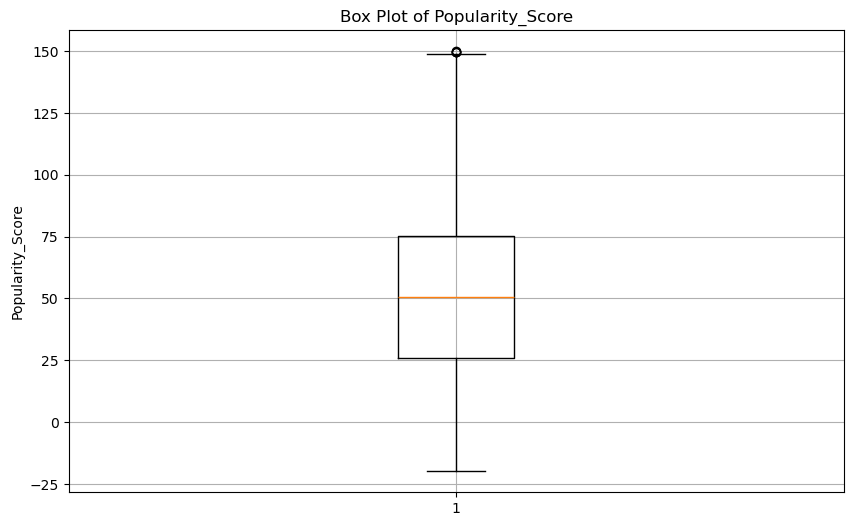

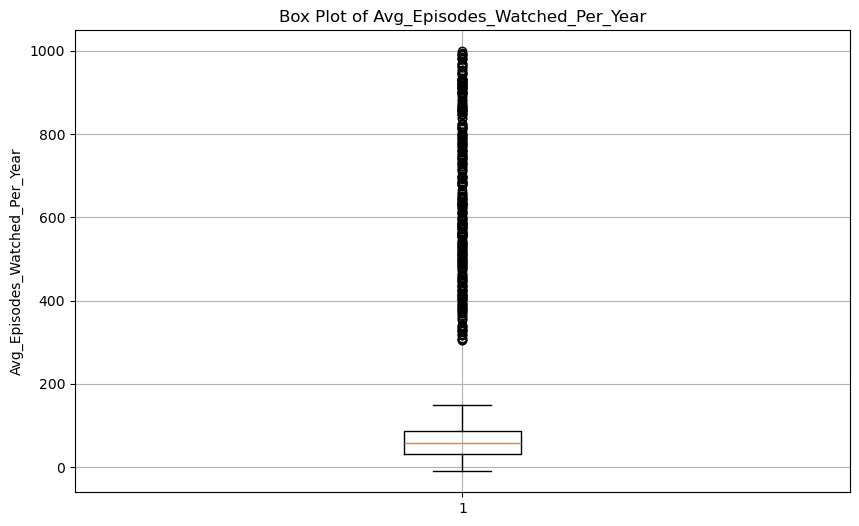

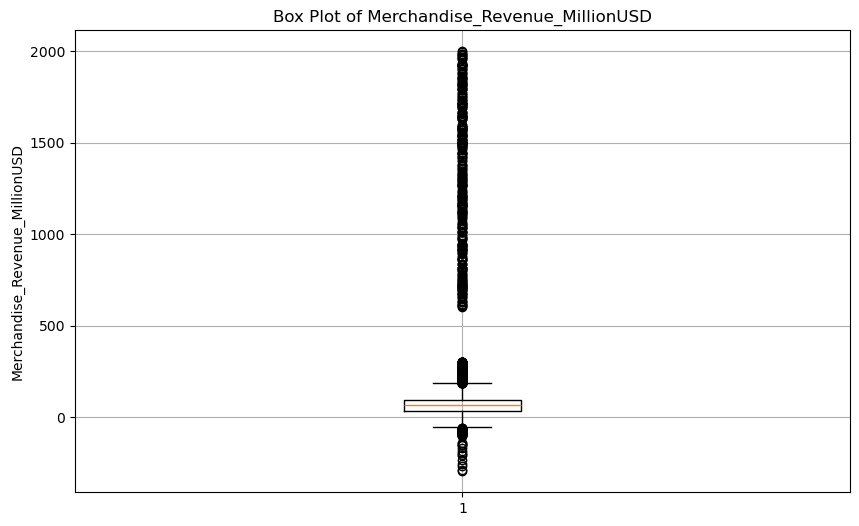

In [23]:
# TODO: Your code here
# plotting box plots
numeric_columns = [
    'Popularity_Score',
    'Avg_Episodes_Watched_Per_Year',
    'Merchandise_Revenue_MillionUSD'
]

for col in numeric_columns:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

In [25]:
def detect_outliers_iqr(data, column):
    print(f'\n{col}')
    # calculate interquartile range
    q25 = data[column].quantile(0.25)
    q75 = data[column].quantile(0.75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = data[(data[column] >= lower) & (data[column] <= upper)]
    print('Non-outlier observations: %d' % len(outliers_removed))

for col in numeric_columns:
    detect_outliers_iqr(df, col)
    


Popularity_Score
Percentiles: 25th=25.816, 75th=75.254, IQR=49.438
Identified outliers: 4
Non-outlier observations: 9996

Avg_Episodes_Watched_Per_Year
Percentiles: 25th=31.500, 75th=86.000, IQR=54.500
Identified outliers: 365
Non-outlier observations: 9635

Merchandise_Revenue_MillionUSD
Percentiles: 25th=33.226, 75th=93.436, IQR=60.209
Identified outliers: 1331
Non-outlier observations: 8669


In [27]:
#capping outlier
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower, lower, data[column])
    data[column] = np.where(data[column] > upper, upper, data[column])

for col in numeric_columns:
    cap_outliers(df, col)

### Task 2.4: Data Transformation

Apply appropriate transformations to prepare the data for analysis:

- Standardize or normalize numerical features if needed
- Create any useful derived features
- Encode categorical variables if necessary

In [29]:
# TODO: Your code here
df_cleaned = df.copy()

#normalising popularity
df_cleaned['Popularity_Score'] = (df['Popularity_Score'] - df['Popularity_Score'].min()) / (df['Popularity_Score'].max() - df['Popularity_Score'].min())

# standerdisation of Avg_Episodes_Watched_Per_Year can de difined as follows but it is not needed
#df_cleaned['Avg_Episodes_Watched_Per_Year'] = (df['Avg_Episodes_Watched_Per_Year'] - df['Avg_Episodes_Watched_Per_Year'].mean()) / df['Avg_Episodes_Watched_Per_Year'].std()


#creating features
# Popularity_per_Episode
df_cleaned['Popularity_per_Episode'] = (
    df['Popularity_Score'] / (df['Avg_Episodes_Watched_Per_Year'] + 1)
)
#Revenue per Episode Watched
df_cleaned['Revenue_per_Episode'] = (
    df['Merchandise_Revenue_MillionUSD'] / (df['Avg_Episodes_Watched_Per_Year'] + 1)
)

## Part 3: Advanced Analysis (Optional)

### Task 3.1: Multicollinearity Analysis using VIF

Variance Inflation Factor (VIF) helps identify correlated features in your dataset:

> You'll need to install statsmodels first: `pip install statsmodels`

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a new dataframe with only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]

print(vif_data)

                          feature       VIF
0                Popularity_Score  2.487401
1   Avg_Episodes_Watched_Per_Year  2.433014
2  Merchandise_Revenue_MillionUSD  2.187838


> **Note**: VIF values > 5 indicate high multicollinearity. [Learn more about VIF here](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/)

### Task 3.2: Dimensionality Reduction with PCA (Optional)

If you'd like to explore dimensionality reduction:
> **Note**: [Learn more about PCA here](https://www.kaggle.com/code/vipulgandhi/pca-beginner-friendly-detailed-explanation)

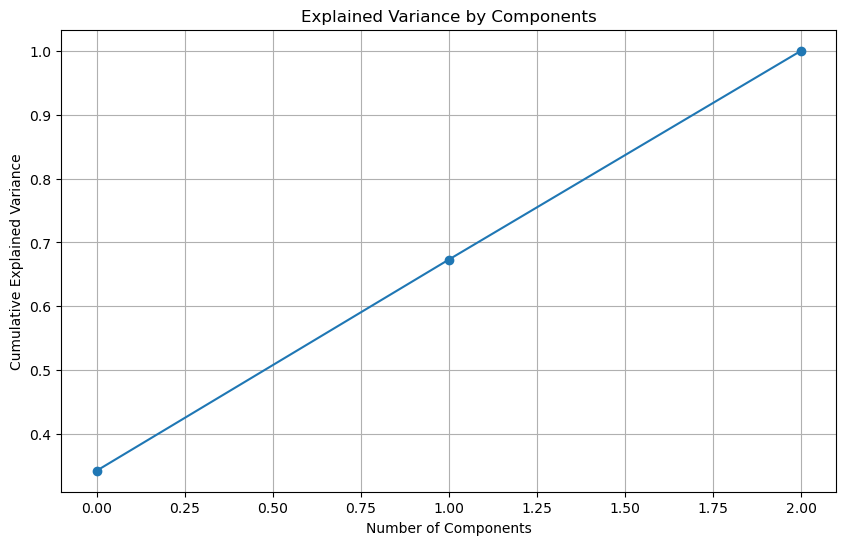

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

## Part 4: Conclusion and Documentation

### Task 4.1: Summarize Your Findings

Write a summary of:
- The initial state of the data
- All issues identified
- Methods used to address each issue
- The final state of the cleaned dataset
- Any insights gained during the process

### Task 4.2: Save Your Cleaned Dataset

Save your cleaned and preprocessed dataset:

In [35]:
# Data Cleaning and Preprocessing

# Initially, the dataset was explored and visualized, revealing several issues:
# - Some numeric data were incorrectly stored as strings, causing plotting errors.
# - Missing values were found in both categorical and numerical columns.

# Data Type Conversion
# String values in numeric columns were converted to numeric types using Pandas functions.

# Handling Missing Values
# For categorical (object) columns, missing values were filled with the mode.
# For numerical columns:
# - Popularity: missing values replaced with the mean.
# - Avg_Episodes_Watched_Per_Year and Merchandise_Revenue_MillionUSD: missing values replaced with the median.

# Text Cleaning
# All string values were capitalized to ensure consistency.
# Country names were checked and corrected for spelling errors.

# Outlier Detection and Treatment
# Box plots (via Matplotlib) were used to visually identify outliers.
# Outliers were handled as follows:
# - Upper outliers were capped at the upper bound.
# - Lower outliers were capped at the lower bound.

# Feature Scaling

# Standardization:
# x_standardized = (x - mean) / std

# Normalization:
# x_normalized = (x - min(x)) / (max(x) - min(x))

# Popularity was normalized to a [0, 1] range.
# Standardization was not applied to Popularity.

# 🆕 Feature Engineering
# Two new features were created:
# 1. Popularity per Episode = Popularity Score / Avg Episodes Watched Per Year
# 2. Revenue per Episode = Merchandise Revenue (Million USD) / Avg Episodes Watched Per Year



In [37]:
# END OF TODO
df_cleaned.to_csv('cartoon_popularity_cleaned.csv', index=False)

# Display the first few rows
print(f"Dataset shape: {df_cleaned.shape}")
df_cleaned.head(20)

Dataset shape: (10000, 7)


,Character,Country,Popularity_Score,Avg_Episodes_Watched_Per_Year,Merchandise_Revenue_MillionUSD,Popularity_per_Episode,Revenue_per_Episode
0,Shinchan,Canada,0.554892,80.0,3.949925,0.914405,0.048765
1,Paw patrol,France,0.593382,48.0,22.316062,1.644529,0.455430
2,Spongebob squarepants,Russia,0.340955,127.5,183.749515,0.294579,1.429957
3,Motu patlu,United Kingdom,0.610096,50.0,27.430804,1.635511,0.537859
4,Mr bean,Egypt,0.571225,9.0,40.715314,7.683136,4.071531
5,Mr bean,Russia,0.557445,100.0,89.884465,0.737613,0.889945
6,Shinchan,China,0.366728,53.0,47.336939,0.781778,0.876610
7,Shinchan,France,0.290719,5.0,87.709441,4.891669,14.618240
8,Motu patlu,Australia,0.435977,72.0,60.295514,0.738875,0.825966
9,Motu patlu,Saudi Arabia,0.404437,73.0,13.710755,0.656744,0.185280


## Submission Guidelines

1. Submit your completed Jupyter notebook (.ipynb file)
2. Include the original and cleaned datasets
3. Make sure all code cells are executed and outputs are visible
4. Add appropriate markdown cells explaining your approach and findings
5. Ensure your notebook is well-organized and follows a logical flow



## Resources

### Pandas and Data Manipulation
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [10 Minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Kaggle: Pandas Tutorial](https://www.kaggle.com/learn/pandas)

### Data Visualization
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)
- [Kaggle: Data Visualization](https://www.kaggle.com/learn/data-visualization)

### Data Cleaning and Preprocessing
- [Handling Missing Values](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)
- [Outlier Detection Methods](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
- [GeeksforGeeks: Data Preprocessing](https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/)

### Advanced Topics
- [Understanding VIF](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/)
- [PCA Explained](https://www.kaggle.com/code/vipulgandhi/pca-beginner-friendly-detailed-explanation)

---

**Good luck with your assignment! Remember, data preprocessing is an art as much as it is a science – there are often multiple valid approaches to handle data issues, so freely use your intution wherever you need.**